In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from prepare import handle_missing_values, missing_nulls, remove_outliers, tts
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.feature_selection import SelectKBest, f_regression

### Get the data from local files

In [2]:
#loading the data
white=pd.read_csv('winequality-white.csv')
red=pd.read_csv('winequality-red.csv')

In [3]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [4]:
white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [5]:
red.shape, white.shape

((1599, 12), (4898, 12))

In [6]:
#assigning the color column to each dataframe
red['color']= 'red'
white['color']= 'white'

In [7]:
red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2      9.8        5   red  
3      9.8        6   red  
4      9.4        5   red

In [8]:
#concatinating the two dataframes into one
wine= pd.concat([red, white], ignore_index=True)

In [9]:
wine.shape

(6497, 13)

In [10]:
#removing outliers
wine, fences=remove_outliers(wine)

quality column ignored
color column ignored


In [11]:
fences

fixed acidity  volatile acidity  citric acid  residual sugar  \
upper_fence           9.65             0.655         0.60           17.55   
lower_fence           4.45            -0.025         0.04           -7.65   

             chlorides  free sulfur dioxide  total sulfur dioxide   density  \
upper_fence     0.1055                 77.0                 274.5  1.003965   
lower_fence    -0.0025                -19.0                 -41.5  0.985365   

                pH  sulphates  alcohol  
upper_fence  3.635      0.855     14.0  
lower_fence  2.795      0.175      6.8

In [12]:
wine.shape

(5024, 13)

In [13]:
#splitting into train validate and test sets
train, val, test= tts(wine, 'quality')

In [14]:
#copying the dataframe for scaling and clustering
train_s = train.copy()

## scale data for clustering

In [15]:
def scale_wine(df):
    mm=sklearn.preprocessing.MinMaxScaler()
    col=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
          'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
    mm.fit(df[col])
    df[col]=mm.transform(df[col])
    return df

In [16]:
train_s=scale_wine(train_s)

In [17]:
train_s

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2383       0.510204          0.260870     0.267857        0.775148   0.430108   
2388       0.591837          0.382609     0.410714        0.591716   0.290323   
5347       0.306122          0.278261     0.375000        0.704142   0.462366   
5635       0.530612          0.434783     0.321429        0.047337   0.311828   
4923       0.448980          0.156522     0.464286        0.082840   0.376344   
...             ...               ...          ...             ...        ...   
1555       0.469388          0.834783     0.232143        0.065089   0.569892   
2994       0.448980          0.191304     0.517857        0.059172   0.290323   
5437       0.367347          0.573913     0.321429        0.248521   0.430108   
4577       0.387755          0.260870     0.285714        0.639053   0.344086   
4218       0.387755          0.469565     0.553571        0.319527   0.548387   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
2383             0.608108              0.754941  0.784207  0.385542   
2388             0.391892              0.446640  0.750170  0.566265   
5347             0.608108              0.505929  0.711368  0.602410   
5635             0.513514              0.675889  0.390742  0.409639   
4923             0.148649              0.438735  0.298843  0.433735   
...                   ...                   ...       ...       ...   
1555             0.175676              0.071146  0.545269  0.771084   
2994             0.337838              0.363636  0.181756  0.349398   
5437             0.635135              0.537549  0.508509  0.409639   
4577             0.581081              0.494071  0.606535  0.192771   
4218             0.391892              0.569170  0.560926  0.361446   

      sulphates   alcohol  quality  color  
2383   0.492063  0.107143        5  white  
2388   0.126984  0.160714        6  white  
5347   0.460317  0.107143        5  white  
5635   0.412698  0.267857        5  white  
4923   0.460317  0.571429        6  white  
...         ...       ...      ...    ...  
1555   0.730159  0.383929        7    red  
2994   0.380952  0.696429        7  white  
5437   0.634921  0.142857        5  white  
4577   0.460317  0.232143        6  white  
4218   0.396825  0.178571        6  white  

[2813 rows x 13 columns]

### Visualizing feature relationships for explore questions

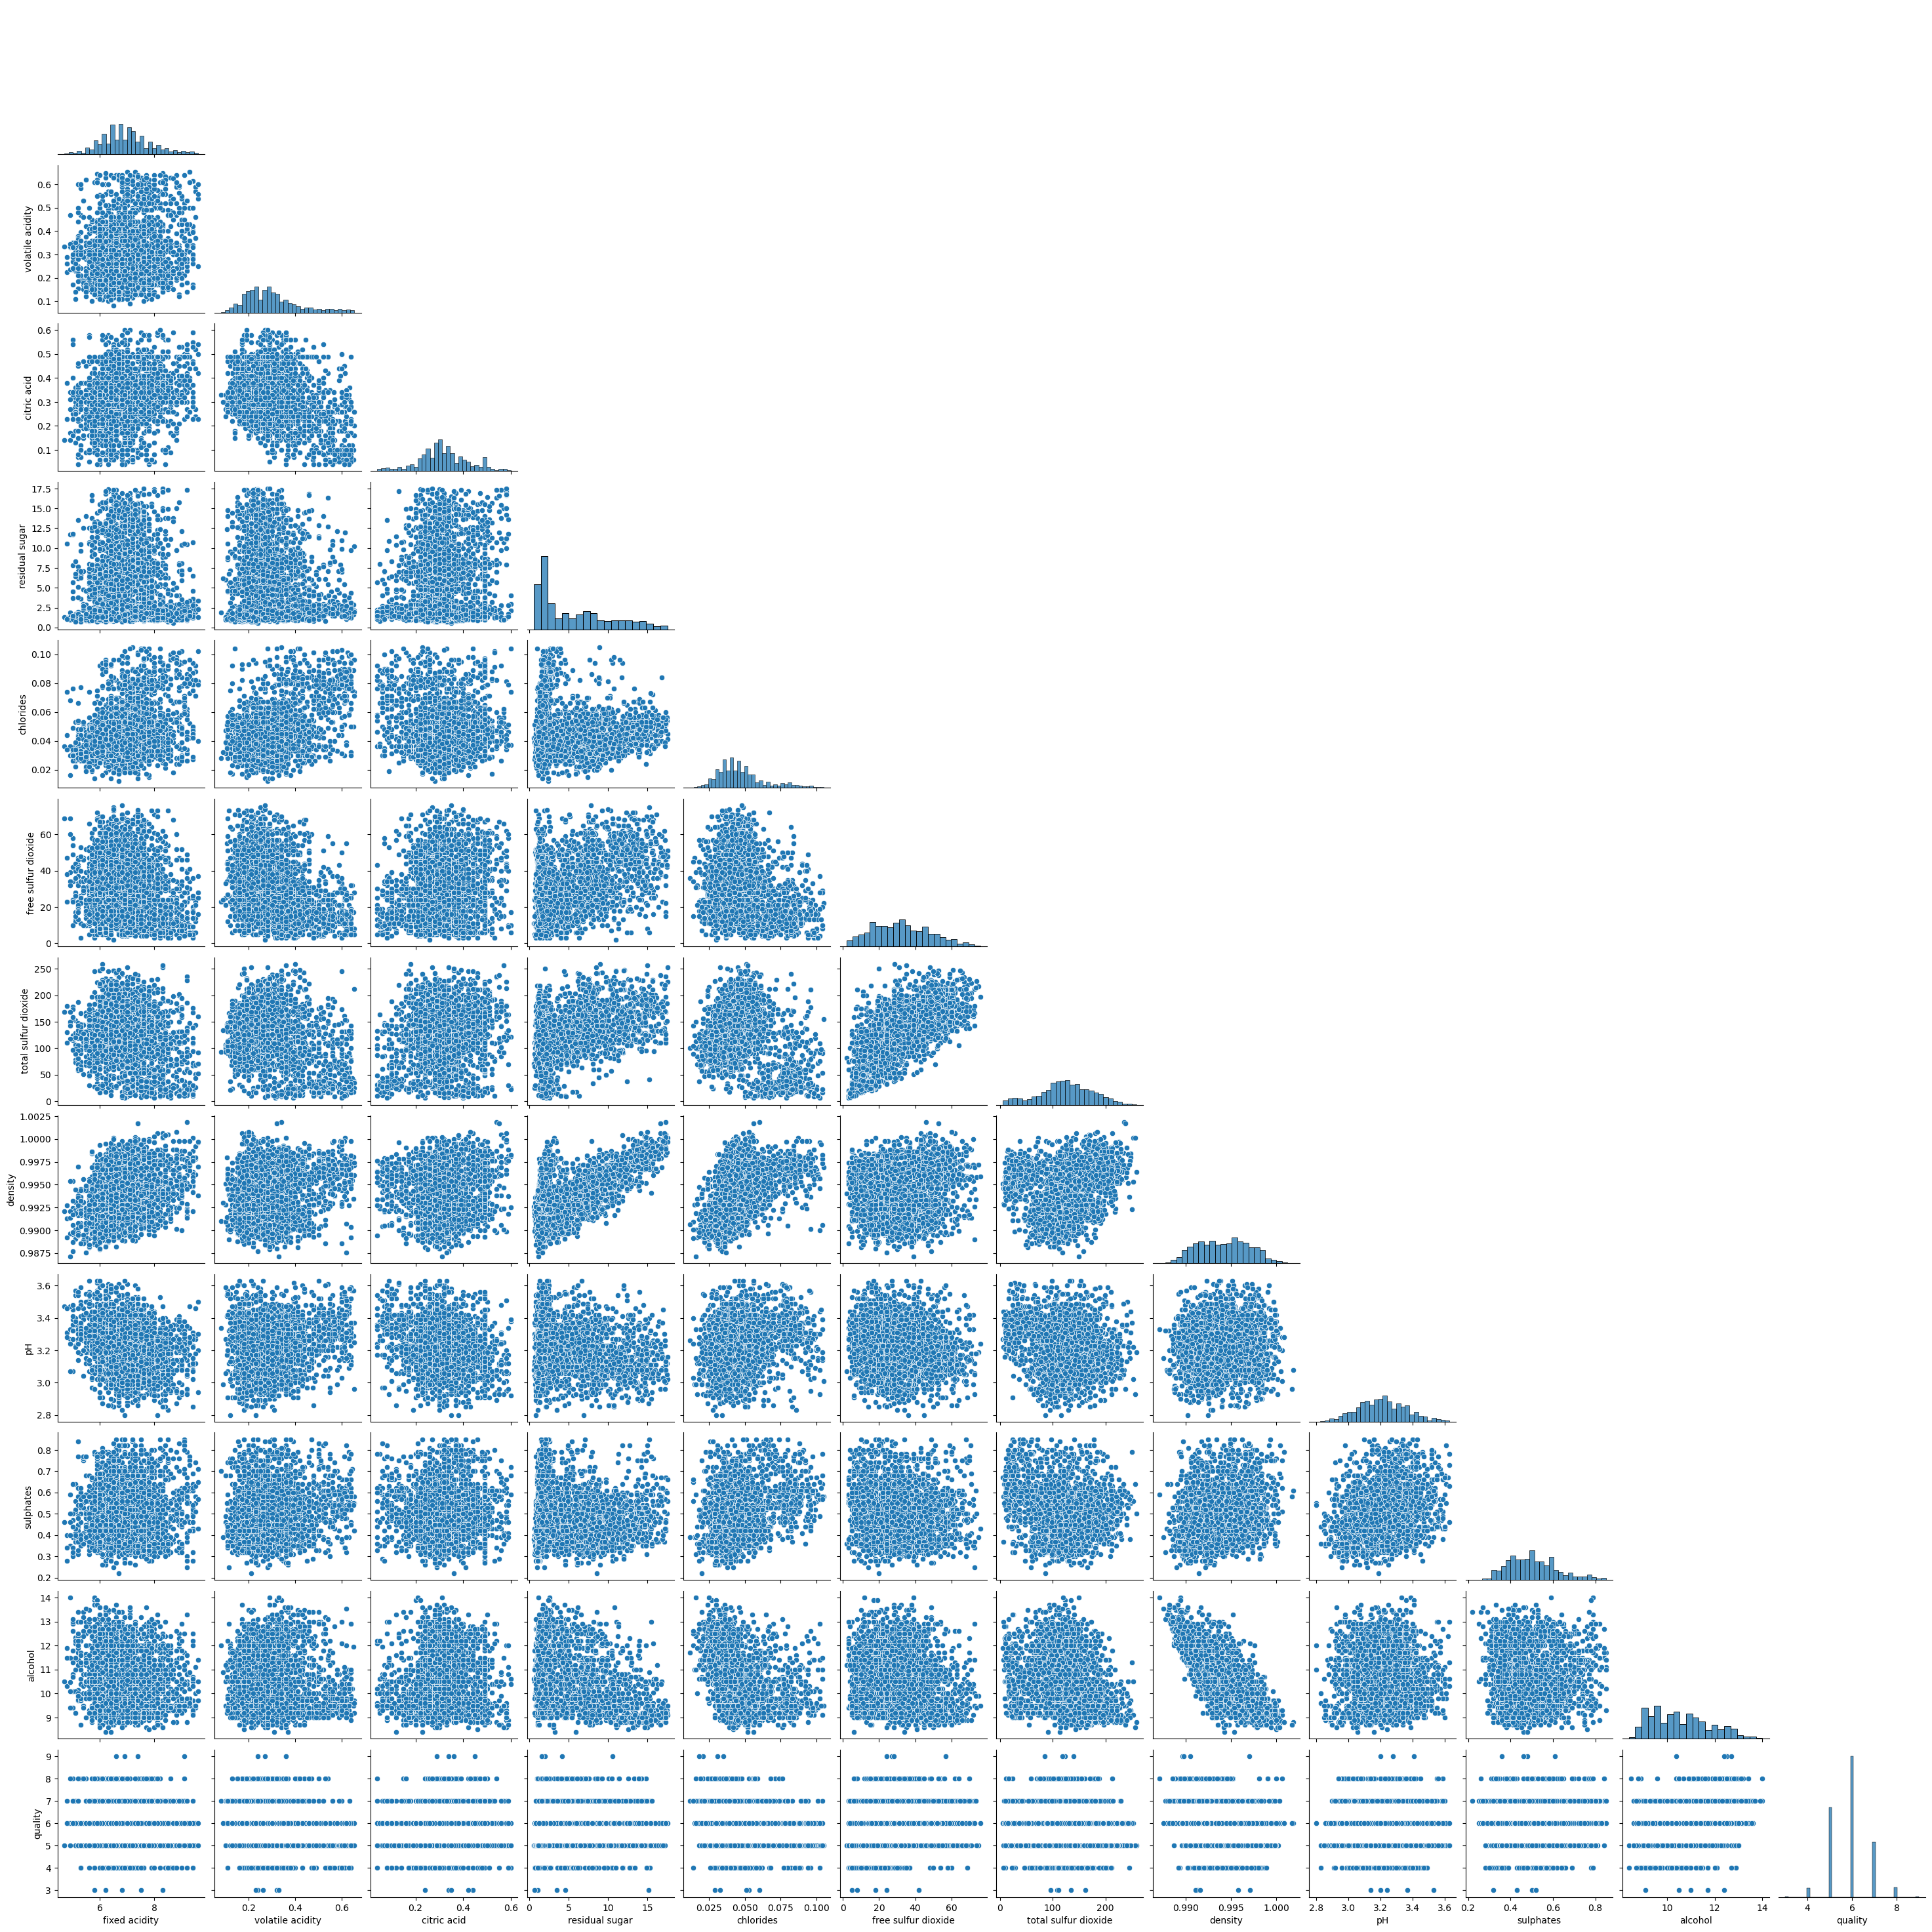

In [18]:
sns.pairplot(data=train, corner=True)
plt.show()

In [19]:
wine.corr()

fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.151369     0.237570   
volatile acidity           0.151369          1.000000    -0.321341   
citric acid                0.237570         -0.321341     1.000000   
residual sugar            -0.032514         -0.115427     0.095674   
chlorides                  0.318411          0.428115    -0.117598   
free sulfur dioxide       -0.173013         -0.282015     0.139146   
total sulfur dioxide      -0.152078         -0.265396     0.170016   
density                    0.346615          0.184812     0.030665   
pH                        -0.250347          0.181579    -0.176101   
sulphates                  0.134418          0.172627     0.020842   
alcohol                   -0.113226         -0.009851     0.042323   
quality                   -0.099163         -0.207188     0.073637   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.032514   0.318411            -0.173013   
volatile acidity           -0.115427   0.428115            -0.282015   
citric acid                 0.095674  -0.117598             0.139146   
residual sugar              1.000000  -0.048546             0.417153   
chlorides                  -0.048546   1.000000            -0.187890   
free sulfur dioxide         0.417153  -0.187890             1.000000   
total sulfur dioxide        0.475077  -0.234741             0.679518   
density                     0.652490   0.523501             0.169149   
pH                         -0.245398   0.204062            -0.124773   
sulphates                  -0.126752   0.308364            -0.100196   
alcohol                    -0.395544  -0.395010            -0.201633   
quality                    -0.039760  -0.270324             0.066600   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                    -0.152078  0.346615 -0.250347   0.134418   
volatile acidity                 -0.265396  0.184812  0.181579   0.172627   
citric acid                       0.170016  0.030665 -0.176101   0.020842   
residual sugar                    0.475077  0.652490 -0.245398  -0.126752   
chlorides                        -0.234741  0.523501  0.204062   0.308364   
free sulfur dioxide               0.679518  0.169149 -0.124773  -0.100196   
total sulfur dioxide              1.000000  0.230981 -0.192033  -0.160168   
density                           0.230981  1.000000  0.053901   0.200033   
pH                               -0.192033  0.053901  1.000000   0.278132   
sulphates                        -0.160168  0.200033  0.278132   1.000000   
alcohol                          -0.328166 -0.776302  0.056584  -0.033455   
quality                          -0.083374 -0.313697  0.038968   0.036141   

                       alcohol   quality  
fixed acidity        -0.113226 -0.099163  
volatile acidity     -0.009851 -0.207188  
citric acid           0.042323  0.073637  
residual sugar       -0.395544 -0.039760  
chlorides            -0.395010 -0.270324  
free sulfur dioxide  -0.201633  0.066600  
total sulfur dioxide -0.328166 -0.083374  
density              -0.776302 -0.313697  
pH                    0.056584  0.038968  
sulphates            -0.033455  0.036141  
alcohol               1.000000  0.438808  
quality               0.438808  1.000000

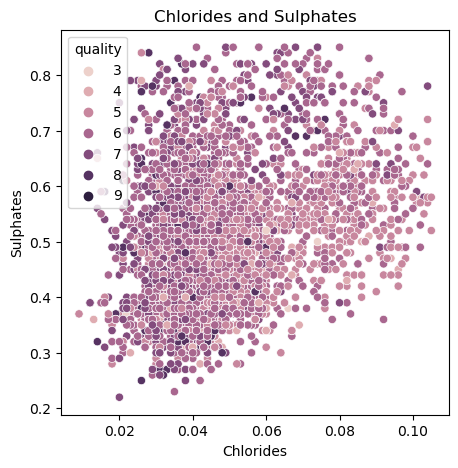

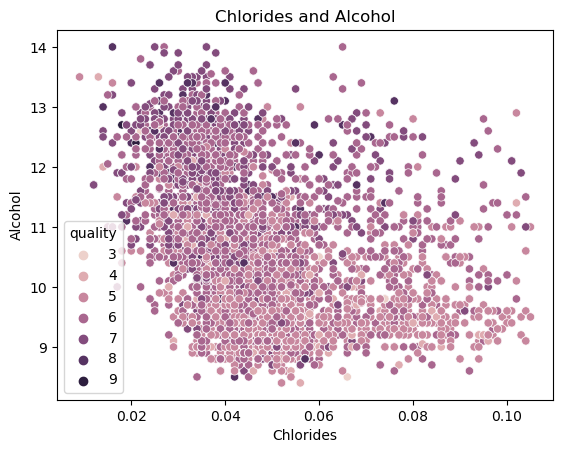

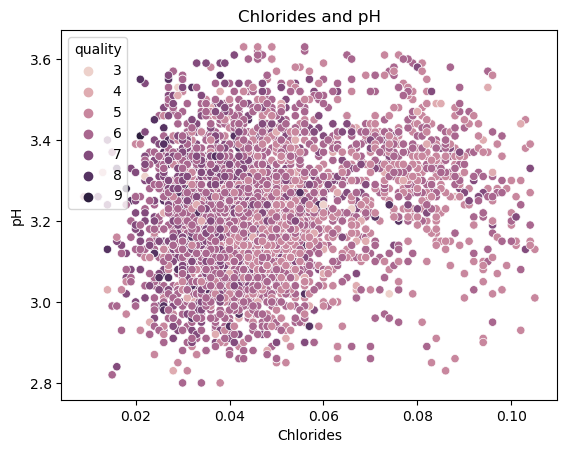

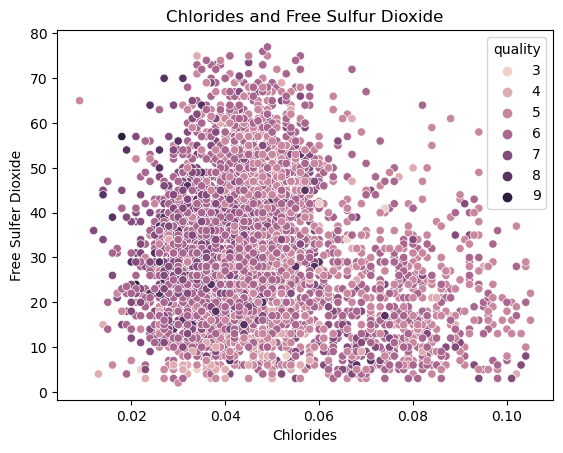

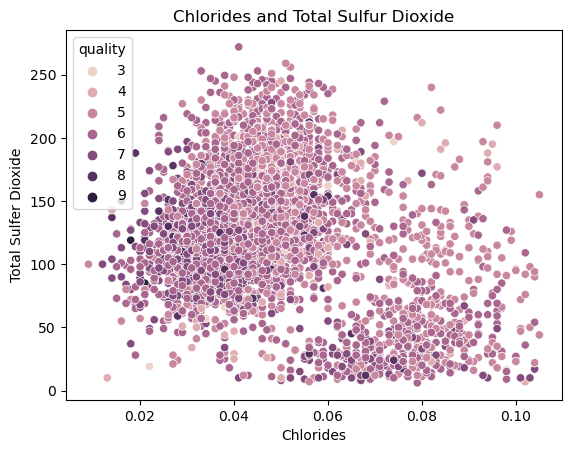

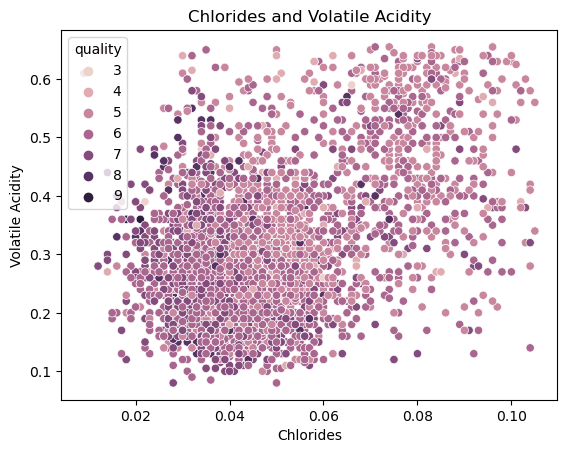

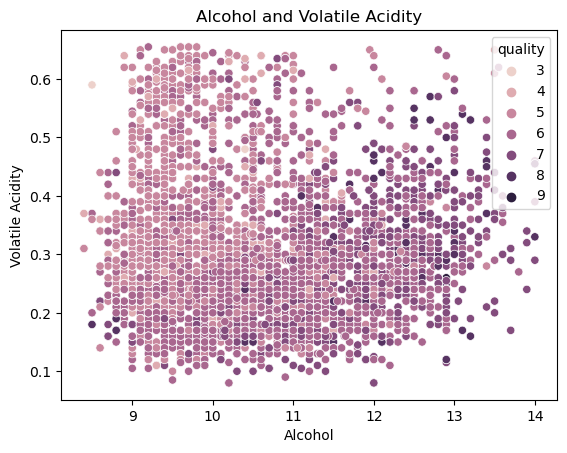

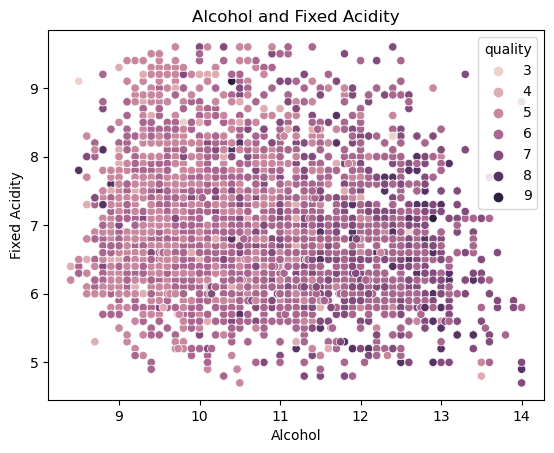

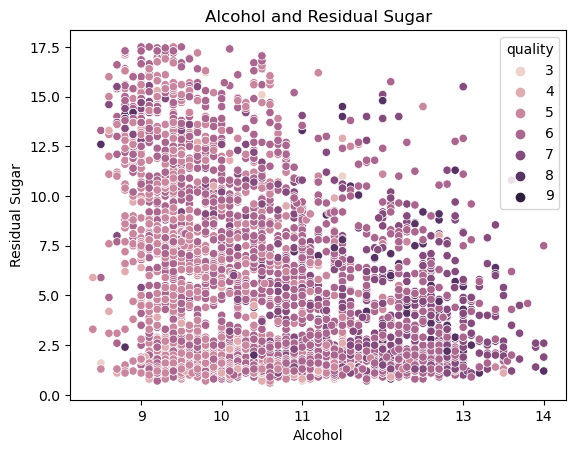

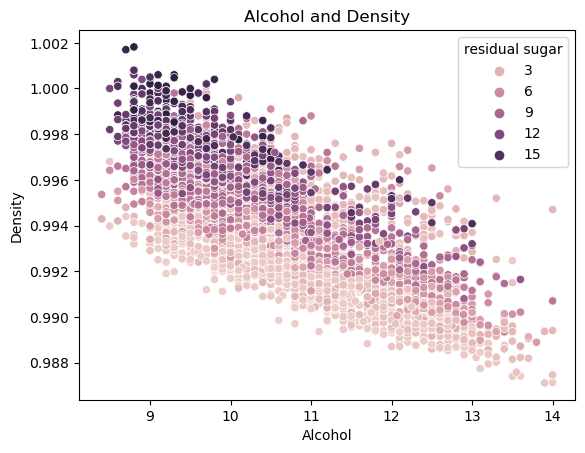

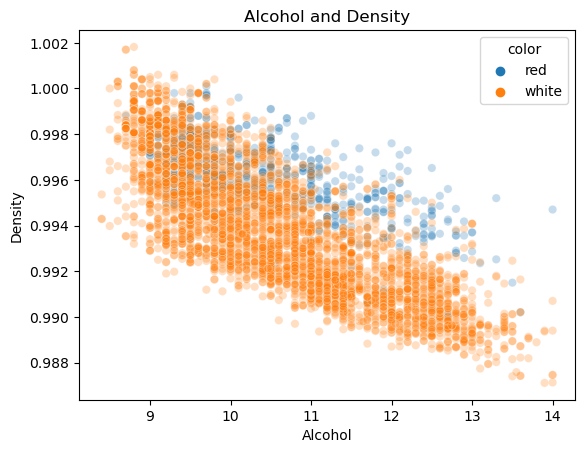

In [20]:
plt.figure(figsize=(5,5))

sns.scatterplot(x='chlorides', y='sulphates', data=wine, hue= 'quality')
plt.title('Chlorides and Sulphates')
plt.xlabel('Chlorides')
plt.ylabel('Sulphates')
plt.show()
plt.clf()

sns.scatterplot(x='chlorides', y='alcohol', data=wine, hue= 'quality')
plt.title('Chlorides and Alcohol')
plt.xlabel('Chlorides')
plt.ylabel('Alcohol')
plt.show()
plt.clf()

sns.scatterplot(x='chlorides', y='pH', data=wine, hue= 'quality')
plt.title('Chlorides and pH')
plt.xlabel('Chlorides')
plt.ylabel('pH')
plt.show()
plt.clf()

sns.scatterplot(x='chlorides', y='free sulfur dioxide', data=wine, hue= 'quality')
plt.title('Chlorides and Free Sulfur Dioxide')
plt.xlabel('Chlorides')
plt.ylabel('Free Sulfer Dioxide')
plt.show()
plt.clf()

sns.scatterplot(x='chlorides', y='total sulfur dioxide', data=wine, hue= 'quality')
plt.title('Chlorides and Total Sulfur Dioxide')
plt.xlabel('Chlorides')
plt.ylabel('Total Sulfer Dioxide')
plt.show()
plt.clf()

sns.scatterplot(x='chlorides', y='volatile acidity', data=wine, hue= 'quality')
plt.title('Chlorides and Volatile Acidity')
plt.xlabel('Chlorides')
plt.ylabel('Volatile Acidity')
plt.show()
plt.clf()

sns.scatterplot(x='alcohol', y='volatile acidity', data=wine, hue= 'quality')
plt.title('Alcohol and Volatile Acidity')
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.show()
plt.clf()

sns.scatterplot(x='alcohol', y='fixed acidity', data=wine, hue= 'quality')
plt.title('Alcohol and Fixed Acidity')
plt.xlabel('Alcohol')
plt.ylabel('Fixed Acidity')
plt.show()
plt.clf()

sns.scatterplot(x='alcohol', y='residual sugar', data=wine, hue= 'quality')
plt.title('Alcohol and Residual Sugar')
plt.xlabel('Alcohol')
plt.ylabel('Residual Sugar')
plt.show()
plt.clf()

sns.scatterplot(x='alcohol', y='density', data=wine, hue= 'residual sugar')
plt.title('Alcohol and Density')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()
plt.clf()

sns.scatterplot(x='alcohol', y='density', data=wine, hue= 'color', alpha=.25)
plt.title('Alcohol and Density')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()
plt.clf()
plt.close()

## Questions to take into exploration
* quality and alcohol
    * average alcohol in wines rated 3 and 9
    * split into two groups of wines with quality 3 and quality 9
    * independent ttest to compare average alcohol content
* avg chloride count for wines with quality rating > 7
    * subset the data for wines with a quality rating greater than 7
    * use a one sample ttest to compare the avg chlorides in wines >7 quality to avg chlorides of all wine

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 1:</h2>
    </header>
    <dl>
        <dt>Is the average alcohol content in low quality wine significantly lower than the alcohol content in high quality wine?</dt>
        <dd>- $H_0$: There is no difference the average alcohol content between wines with a quality of less than 5 and wines with a quality greater than 7</dd>
        <dd>- $H_a$: The average alcohol content of wines with a quality less than 6 is <strong>significantlly lower</strong> than the average alcohol content of wines with a quality greater than 6</dd>
    </dl>
</div>

In [32]:
#creating groups by quality to compare
q3= train[train['quality']<6]
q9= train[train['quality']>6]

In [33]:
train.shape

(2813, 13)

In [34]:
#checking sample size
q3.shape, q9.shape

((915, 13), (600, 13))

In [35]:
#setting alpha
alpha=0.05

In [72]:
def q1_plots():
    plt.figure(figsize=(10,5))
    plt.subplot(221)
    sns.histplot(x='alcohol', data=q3)
    plt.title('Low Quality Wine (3-4)')
    plt.xlabel('Alcohol')
    plt.grid(True, alpha=0.3, linestyle='--')

    plt.subplot(222)
    sns.histplot(x='alcohol', data=q9)
    plt.title('High Quality Wine (8-9)')
    plt.xlabel('Alcohol')
    plt.grid(True, alpha=0.3, linestyle='--')
    
    plt.figure(figsize=(25,10))
    plt.subplot(223)
    plt.title('High and Low Quality Wines')
    sns.histplot(x='alcohol', data=q3, alpha=.5, color='green', label= 'Low Quality')
    sns.histplot(x='alcohol', data=q9, alpha=.25, label='High Quality')
    plt.xlabel('Alcohol')
    plt.axvline(x=(q3['alcohol'].mean()), color='red', label='Low Quality Mean')
    plt.axvline(x=(q9['alcohol'].mean()), color='yellow', label='High Quality Mean')
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.subplots_adjust(left=0.1,
                            bottom=-0.1,
                            right=0.9,
                            top=0.9,
                            wspace=0.4,
                            hspace=0.4)
    plt.show()

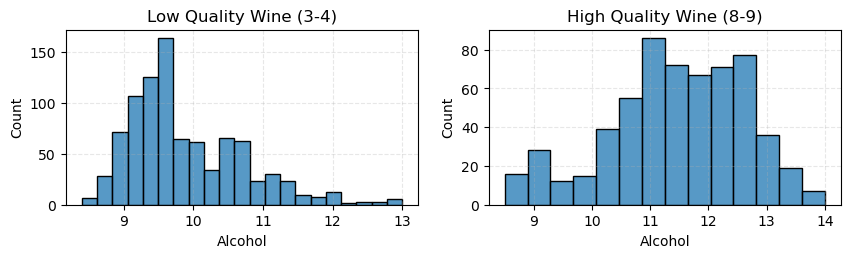

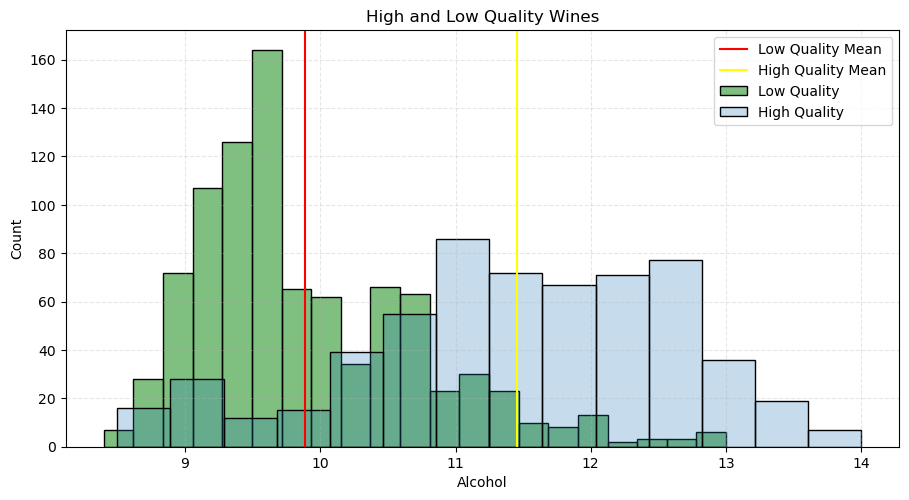

In [74]:
q1_plots()

In [46]:
#check for equal variance
print(q3['alcohol'].var())
print(q9['alcohol'].var())

0.6907620852050103
1.417987125898072


In [52]:
q3m=q3['alcohol']
q9m=q9['alcohol']
t, p=stats.ttest_ind(q3m,q9m, equal_var=False, alternative='less')

In [53]:
t,p

(-28.017902757513962, 1.4328338996461513e-127)

**Takeaways**
* The p value is lower than alpha
* I can say with confidence that the average alcohol content in low quality wines is significantly lower than the average alcohol content in high quality wines

<div class="alert alert-info">
    <header>
    <h2>Exploration Question 2:</h2>
    </header>
    <dl>
        <dt>Is the average chloride in high quality wine significantly lower than the average chloride for all wines?</dt>
        <dd>- $H_0$: There is no difference the average chloride in wines with a quality greater than 6 and the average chloride in all wines</dd>
        <dd>- $H_a$: The average chloride of wines with a quality greater than 6 is <strong>significantlly lower</strong> than the average chloride of all wines</dd>
    </dl>
</div>

In [76]:
#sample shapes
q9.shape, train.shape

((600, 13), (2813, 13))

In [117]:
def q2_plots():
    plt.figure(figsize=(10,5))
    plt.subplot(221)
    sns.histplot(x='chlorides', data=q3)
    plt.title('High Quality Wine (7-9)')
    plt.xlabel('Chlorides')
    plt.grid(True, alpha=0.3, linestyle='--')

    plt.subplot(222)
    sns.histplot(x='chlorides', data=train)
    plt.title('All Wine')
    plt.xlabel('Chlorides')
    plt.grid(True, alpha=0.3, linestyle='--')
    
    plt.figure(figsize=(25,10))
    plt.subplot(223)
    plt.title('High/All Quality Wines')
    sns.histplot(x='chlorides', data=train, alpha=.5, color='green', label= 'All')
    sns.histplot(x='chlorides', data=q9, alpha=.75, label='High Quality')
    plt.xlabel('Chlorides')
    plt.axvline(x=(train['chlorides'].mean()), color='red', label='All Wine Mean')
    plt.axvline(x=(q9['chlorides'].mean()), color='yellow', label='High Quality Mean')
    plt.legend()
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.subplots_adjust(left=0.1,
                            bottom=-0.1,
                            right=0.9,
                            top=0.9,
                            wspace=0.4,
                            hspace=0.4)
    plt.show()

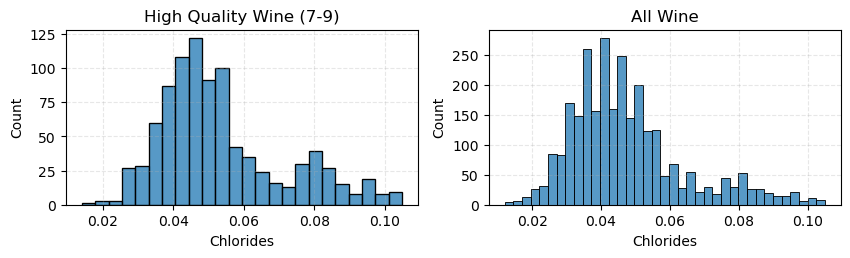

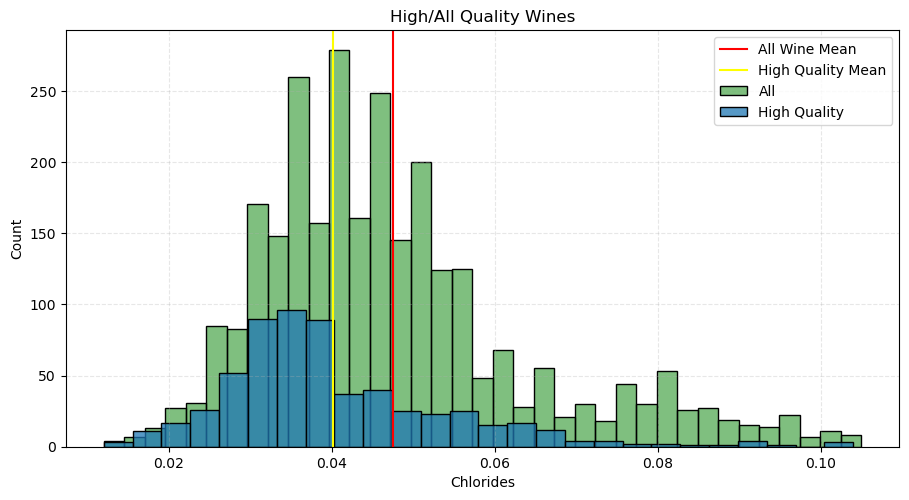

In [118]:
q2_plots()

In [84]:
#performing the statistical test for one sample
chlmean=train['chlorides'].mean()
t, p = stats.ttest_1samp(q9['chlorides'],chlmean)
t, p

(-12.99030179050282, 3.596264927934805e-34)

**Takeaways**
* The p value is lower than alpha
* I can say with confidence that the average amount of chlorides in high quality wine is significantly lower than the average wine in this dataset

## Clustering

In [86]:
train_s.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2383       0.510204          0.260870     0.267857        0.775148   0.430108   
2388       0.591837          0.382609     0.410714        0.591716   0.290323   
5347       0.306122          0.278261     0.375000        0.704142   0.462366   
5635       0.530612          0.434783     0.321429        0.047337   0.311828   
4923       0.448980          0.156522     0.464286        0.082840   0.376344   

      free sulfur dioxide  total sulfur dioxide   density        pH  \
2383             0.608108              0.754941  0.784207  0.385542   
2388             0.391892              0.446640  0.750170  0.566265   
5347             0.608108              0.505929  0.711368  0.602410   
5635             0.513514              0.675889  0.390742  0.409639   
4923             0.148649              0.438735  0.298843  0.433735   

      sulphates   alcohol  quality  color  
2383   0.492063  0.107143        5  white  
2388   0.126984  0.160714        6  white  
5347   0.460317  0.107143        5  white  
5635   0.412698  0.267857        5  white  
4923   0.460317  0.571429        6  white

In [87]:
#setting values to cluster by
X=train_s[['chlorides', 'residual sugar']]

In [100]:
#making, fitting, and predicting clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

train_s['cluster']=kmeans.predict(X)


In [101]:
#finding the centroids
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

chlorides  residual sugar
0   0.324934        0.409284
1   0.290436        0.088095
2   0.390404        0.763734
3   0.710894        0.112652

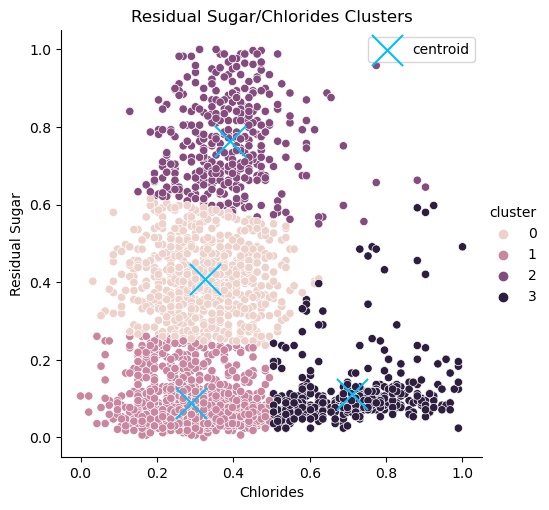

In [116]:
#visualizing the clusters
sns.relplot(data=train_s, x='chlorides', y='residual sugar', hue='cluster')
centroids.plot.scatter(y='residual sugar', x='chlorides', c='deepskyblue', marker='x', s=500, 
                       ax=plt.gca(), label='centroid')
plt.xlabel('Chlorides')
plt.ylabel('Residual Sugar')
plt.title('Residual Sugar/Chlorides Clusters')

plt.show()

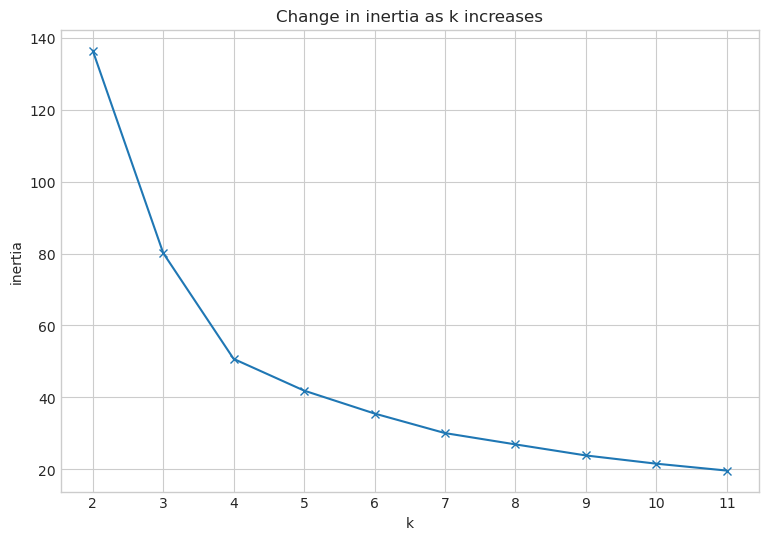

In [113]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
plt.show()

**Takeaways**
* 4 lookes to be the ideal number of clusters
* I can add the clusters for residual sugars and chlorides to a newly engineered feature and drop the old columns